<a href="https://colab.research.google.com/github/sejongsmarcle/2023_Spring_Kaggle_Study/blob/main/%5BKAGGLE%5D_2%EC%A3%BC%EC%B0%A8_%EC%84%9C%EC%9A%B8%EC%8B%9C_%EB%94%B0%EB%A6%89%EC%9D%B4_%EB%8C%80%EC%97%AC%EB%9F%89_%EC%98%88%EC%B8%A1_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. 라이브러리 및 데이터
----
(1) pandas: 파이썬으로 작성된 데이터 분석/조작을 위한 라이브러리




(2) RandomForestRegressor : 과대적합 방지를 위해, 최적의 변수를 랜덤하게 선택하는 머신러닝 기법


In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor 

In [2]:
train = pd.read_csv('/var/tmp/train.csv') # 모델 시험지 파일

test = pd.read_csv('/var/tmp/test.csv') # 모델 학습 파일

submission = pd.read_csv('/var/tmp/submission.csv') #답안지 파일 

## 2. 탐색적 자료분석
## Exploratory Data Analysis (EDA)


### 2-1. 데이터 분석

+ id : 날짜와 시간별 id
+ hour_bef_temperature : 1시간 전 기온
+ hour_bef_precipitation : 1시간 전 비 정보, 비가 오지 않았으면 0, 비가 오면 1
+ hour_bef_windspeed : 1시간 전 풍속(평균)
+ hour_bef_humidity : 1시간 전 습도
+ hour_bef_visibility : 1시간 전 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
+ hour_bef_ozone : 1시간 전 오존
+ hour_bef_pm10 : 1시간 전 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
+ hour_bef_pm2.5 : 1시간 전 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
+ count : 시간에 따른 따릉이 대여 수 

In [3]:
# train - 5개 행을 보여줌 
# 모두 수치형으로 들어감을 확인 
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [4]:
# test - 5개 행을 보여줌 
# count를 예측해야하므로 나오지 않음 
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


### 2-2. 결측값 확인

In [5]:
# train의 결측값 총계를 확인하기 
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [6]:
# test의의 결측값 총계를 확인하기
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

### 2-3-1. 결측값 입력 - TRAIN

- 'hour_bef_temperature' 

- 'hour_bef_windspeed'
-----
isna() : 결측치 여부 확인

fillna() : 결측치 값 채워넣기

inplace : 원본을 편집한대로 저장여부
True면 저장, False면 저장X

In [8]:
# (1) 결측값 있는 행 확인 / temperature
train[train['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [9]:
# (1) 평균온도로 넣으면 차이가 많이 나기 때문에 시간별 평균온도를 사용
train.groupby('hour').mean()['hour_bef_temperature']

hour
0     14.788136
1     14.155738
2     13.747541
3     13.357377
4     13.001639
5     12.673770
6     12.377049
7     12.191803
8     12.600000
9     14.318033
10    16.242623
11    18.019672
12    19.457377
13    20.648333
14    21.234426
15    21.744262
16    22.015000
17    21.603333
18    20.926667
19    19.704918
20    18.191803
21    16.978333
22    16.063934
23    15.418033
Name: hour_bef_temperature, dtype: float64

In [11]:
# (1) 934, 1035번 행을 위의 시간별 평균, 딕셔너리 형태로 대입
# inplace로 저장함
train['hour_bef_temperature'].fillna({934:14.788136,1035:20.926667},inplace=True)

In [12]:
# (2) 결측값 있는 행 확인 / windspeed
train[train['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
18,33,13,22.600000,0.0,NaN,41.0,987.0,0.046,64.0,39.0,208.0
244,381,1,14.100000,0.0,NaN,55.0,1992.0,NaN,NaN,NaN,38.0
260,404,3,14.000000,0.0,NaN,50.0,2000.0,0.049,35.0,22.0,17.0
376,570,0,14.300000,0.0,NaN,49.0,2000.0,0.044,37.0,20.0,58.0
780,1196,20,16.500000,0.0,NaN,31.0,2000.0,0.058,39.0,18.0,181.0
934,1420,0,14.788136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1138,1717,12,21.400000,0.0,NaN,44.0,1375.0,0.044,61.0,37.0,116.0
1229,1855,2,14.000000,0.0,NaN,52.0,2000.0,0.044,37.0,20.0,20.0


In [13]:
# (2) 시간별 풍속
train.groupby('hour').mean()['hour_bef_windspeed']

hour
0     1.965517
1     1.836667
2     1.633333
3     1.620000
4     1.409836
5     1.296721
6     1.331148
7     1.262295
8     1.632787
9     1.829508
10    2.122951
11    2.485246
12    2.766667
13    3.281356
14    3.522951
15    3.768852
16    3.820000
17    3.801667
18    3.838333
19    3.595082
20    3.278333
21    2.755000
22    2.498361
23    2.195082
Name: hour_bef_windspeed, dtype: float64

In [14]:
# (2) 행을 위의 시간별 평균, 딕셔너리 형태로 대입
# inplace로 저장함
train['hour_bef_windspeed'].fillna({18:3.281356,244:1.836667,260:1.620000,376:1.965517,780:3.278333,934:1.965517,1035:3.838333,1138:2.766667,1229:1.633333},inplace=True)

### 2-3-2. 결측값 입력 - TEST

In [15]:
# (1) 각각 한 개인 결측값을 바꿈
test['hour_bef_temperature'].fillna(19.704918, inplace=True)
test['hour_bef_windspeed'].fillna(3.595082, inplace=True)

## 3. 변수 선택 및 모델 구축
## Feature Engineering & Initial Modeling


In [16]:
# 사용할 변수 feature
features = ['hour','hour_bef_temperature','hour_bef_windspeed']

In [19]:
# 학습 시킬 데이터를 분리
X_train = train[features]
y_train = train['count']
X_test = test[features]

In [20]:
# 각 데이터의 개수 확인
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1459, 3)
(1459,)
(715, 3)


#### RandomForest
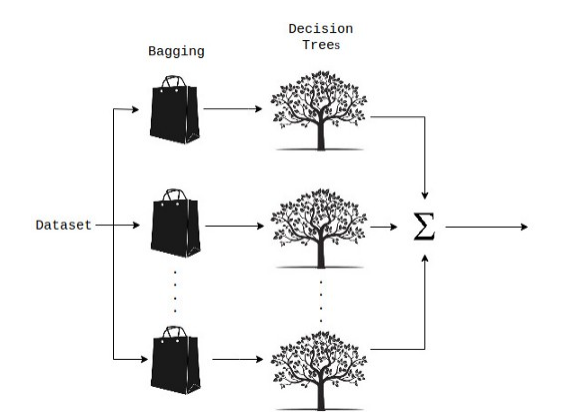
 (1) ensemble 기법 중 하나 
    
     : 여러 번 샘플을 뽑아서 각 모델을 학습시켜 결과를 집계하는 방법으로 다수의 모델델을 연결하여 강력한 모델을 만든다. 

 (2) ML - classifier, Regression 문제에 효과적
 
 (3) parameter

    ① n_estimators : 생성할 트리의 개수
    ② max_features : - 최대 선택할 특성의 수
                      - 트리를 얼마나 무작위로 나눌 것인지 결정
    ③ max_depth : - 트리의 깊이 
                   - 이 수가 높을 수록 복잡한 트리가 도출
                   - 일반적으로 트리를 너무 깊게 만들면 모델이 복잡해져서 overfitting문제가 발생

In [21]:
model100 = RandomForestRegressor(n_estimators=100, random_state=0)
model100_5 = RandomForestRegressor(n_estimators=100, max_depth =5,  random_state=0)
model200 = RandomForestRegressor(n_estimators=200)

In [22]:
# 3개를 설정해서 학습진행행
model100.fit(X_train, y_train)
model100_5.fit(X_train, y_train)
model200.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [23]:
# 결과값을 ypred에 대입
ypred1=model100.predict(X_test)
ypred2=model100_5.predict(X_test)
ypred3=model200.predict(X_test)

## 4. CSV 파일로 저장

In [25]:
# submission - 답안을 csv 파일 형식으로 제출
submission['count']=ypred1
submission.to_csv('moodel100.csv',index=False)

In [26]:
# submission - 답안을 csv 파일 형식으로 제출
submission['count']=ypred2
submission.to_csv('moodel100_5.csv',index=False)

In [30]:
# submission - 답안을 csv 파일 형식으로 제출
submission['count']=ypred3
submission.to_csv('moodel200=.csv',index=False)

## 결과

'moodel200=.csv'가 가장 높은 결과를 도출


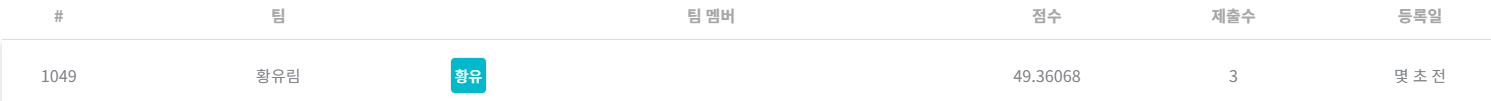

